In [104]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 01. MODIFIED FISH Dataset

In [105]:
df = pd.read_csv("Fish_Modified.csv")

In [106]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
3,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
4,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555


In [107]:
df.shape

(163, 7)

In [108]:
df.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [109]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [110]:
df.duplicated().sum()

3

In [111]:
df.drop_duplicates(inplace = True)

In [112]:
df.describe(percentiles = [0.005, 0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99, 0.995])

,Weight,Length1,Length2,Length3,Height,Width
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,401.952054,26.504341,28.629863,31.416686,9.048438,4.532821
std,358.090741,9.904792,10.719196,11.662783,4.343864,1.753175
min,0.000000,7.500000,8.400000,8.800000,1.738800,1.047600
0.5%,4.690500,8.931000,9.513000,10.390000,1.924194,1.127736
1%,6.372000,9.713000,10.213000,11.272000,1.975658,1.155244
5%,9.800000,11.473077,12.168077,13.309091,2.260500,1.285130
10%,30.790000,13.470000,14.660000,16.180000,3.794400,2.247920
25%,120.000000,19.700000,21.225000,23.500000,5.949000,3.525000
50%,281.500000,25.500000,27.500000,29.700000,7.789000,4.376200


In [113]:
df.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [114]:
df['Species'].value_counts()

Perch        56
Bream        36
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [115]:
df.isin([0]).any()

Species    False
Weight      True
Length1    False
Length2    False
Length3    False
Height     False
Width      False
dtype: bool

In [116]:
df['Weight'].isin([0]).value_counts()

False    159
True       1
Name: Weight, dtype: int64

In [117]:
df.loc[df['Weight'].isin([0])]

,Species,Weight,Length1,Length2,Length3,Height,Width
43,Roach,0.0,19.0,20.5,24.7,6.4752,3.3516


#### Dropping 1 '0' value in Weight attribute

In [118]:
mask1 = df.loc[df['Weight'].isin([0])]
df.drop(mask1.index, axis = 0, inplace = True)

In [119]:
df.shape

(159, 7)

### Removing outliers using std dev

In [120]:
from scipy import stats

z_scores = stats.zscore(df.drop('Species', axis = 1))
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_new = df[filtered_entries]

4 outliers found using standard deviation. But not removed. Removing later.

In [121]:
df_new.shape

(155, 7)

In [122]:
# df = df_new

In [123]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size = 0.2, random_state = 42)

array([[<AxesSubplot:title={'center':'Weight'}>,
        <AxesSubplot:title={'center':'Length1'}>],
       [<AxesSubplot:title={'center':'Length2'}>,
        <AxesSubplot:title={'center':'Length3'}>],
       [<AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Width'}>]], dtype=object)

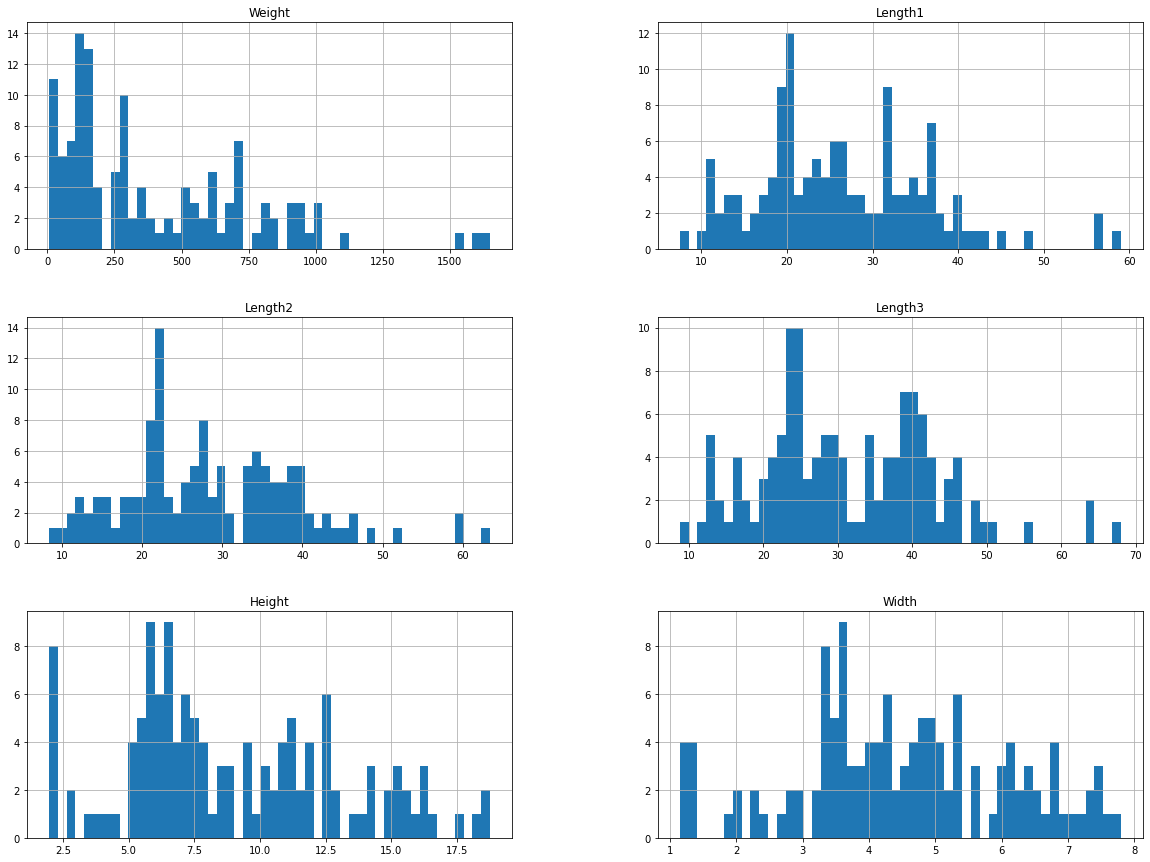

In [124]:
df_train.hist(bins = 50, figsize = (20, 15))

<AxesSubplot:>

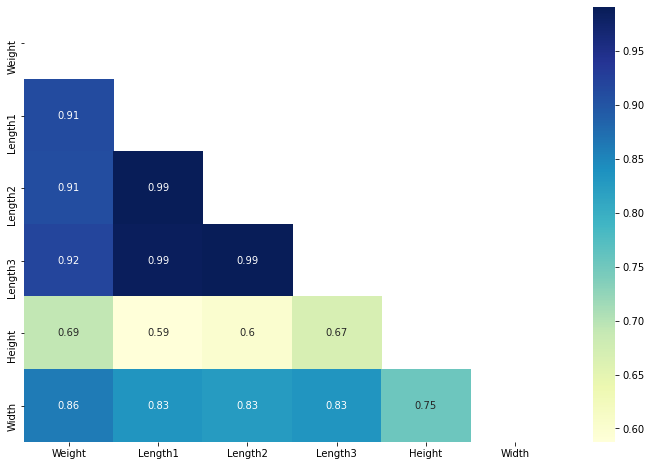

In [125]:
corr_mat = df_train.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_mat, mask = np.triu(corr_mat), cmap="YlGnBu", annot = True)

#### Length1 is highly correlated to Length2 and Length3 indicating multi-collinearity. We will thus use just Length1 out of the 3 as our feature variable

In [126]:
target = 'Weight'
features = ['Length1', 'Height', 'Width', 'Species']

In [127]:
df_train['Species'].value_counts()

Perch        47
Bream        26
Roach        18
Pike         14
Parkki       10
Smelt         9
Whitefish     3
Name: Species, dtype: int64

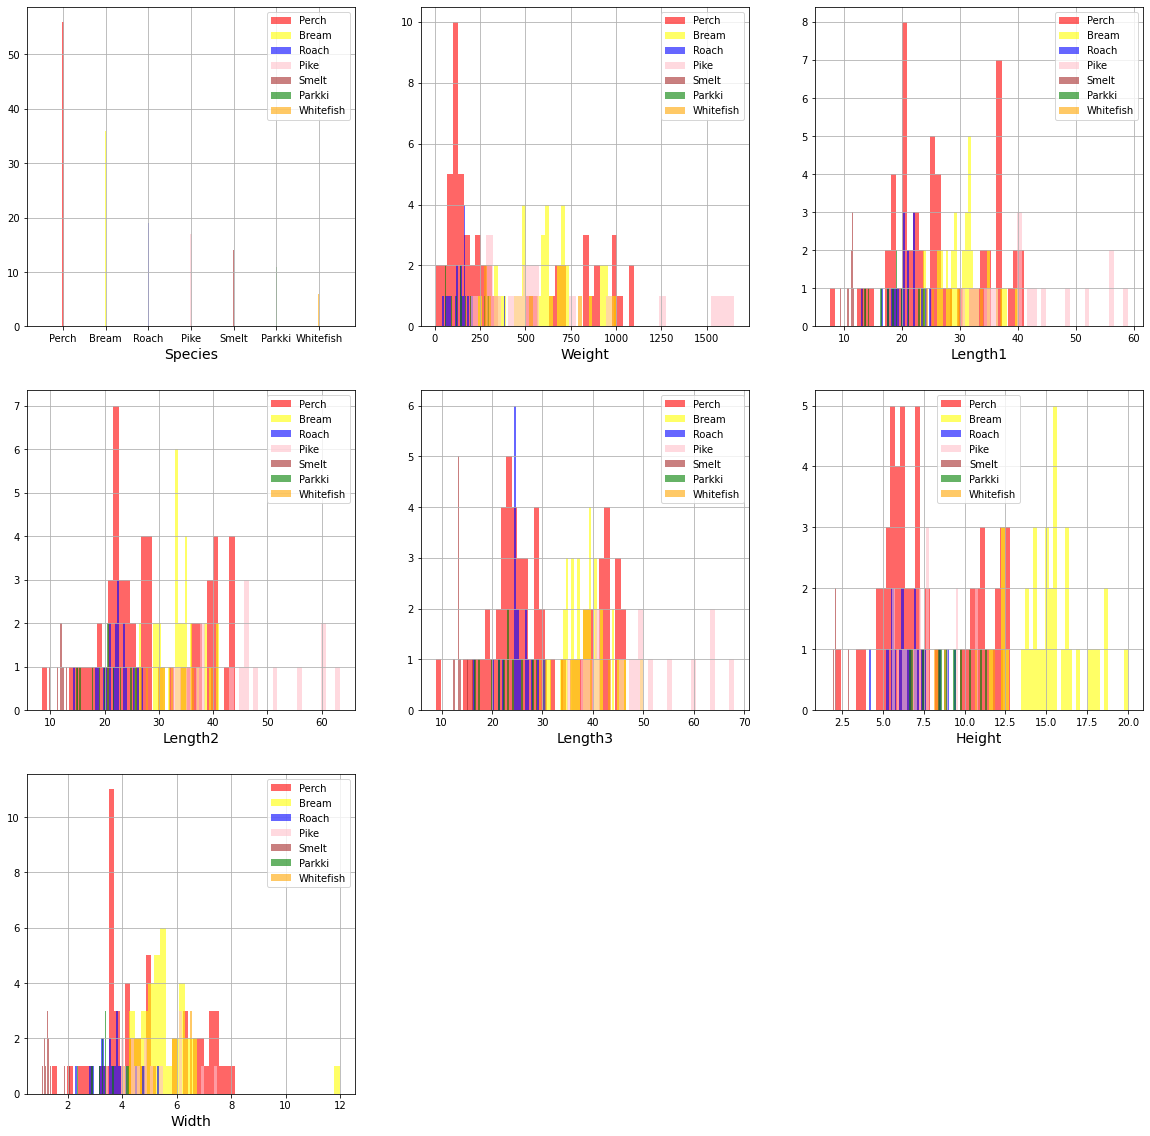

In [128]:
plt.figure(figsize=(20, 20))

for i, column in enumerate(df_train, 1):
    plt.subplot(3, 3, i)
    df[df['Species'] == 'Perch'][column].hist(bins=35, color='red', label='Perch', alpha=0.6)
    df[df['Species'] == 'Bream'][column].hist(bins=35, color='yellow', label='Bream', alpha=0.6)
    df[df['Species'] == 'Roach'][column].hist(bins=35, color='blue', label='Roach', alpha=0.6)
    df[df['Species'] == 'Pike'][column].hist(bins=35, color='pink', label='Pike', alpha=0.6)
    df[df['Species'] == 'Smelt'][column].hist(bins=35, color='brown', label='Smelt', alpha=0.6)
    df[df['Species'] == 'Parkki'][column].hist(bins=35, color='green', label='Parkki', alpha=0.6)
    df[df['Species'] == 'Whitefish'][column].hist(bins=35, color='orange', label='Whitefish', alpha=0.6)
    plt.legend()
    plt.xlabel(column, fontsize = 14)
    print()

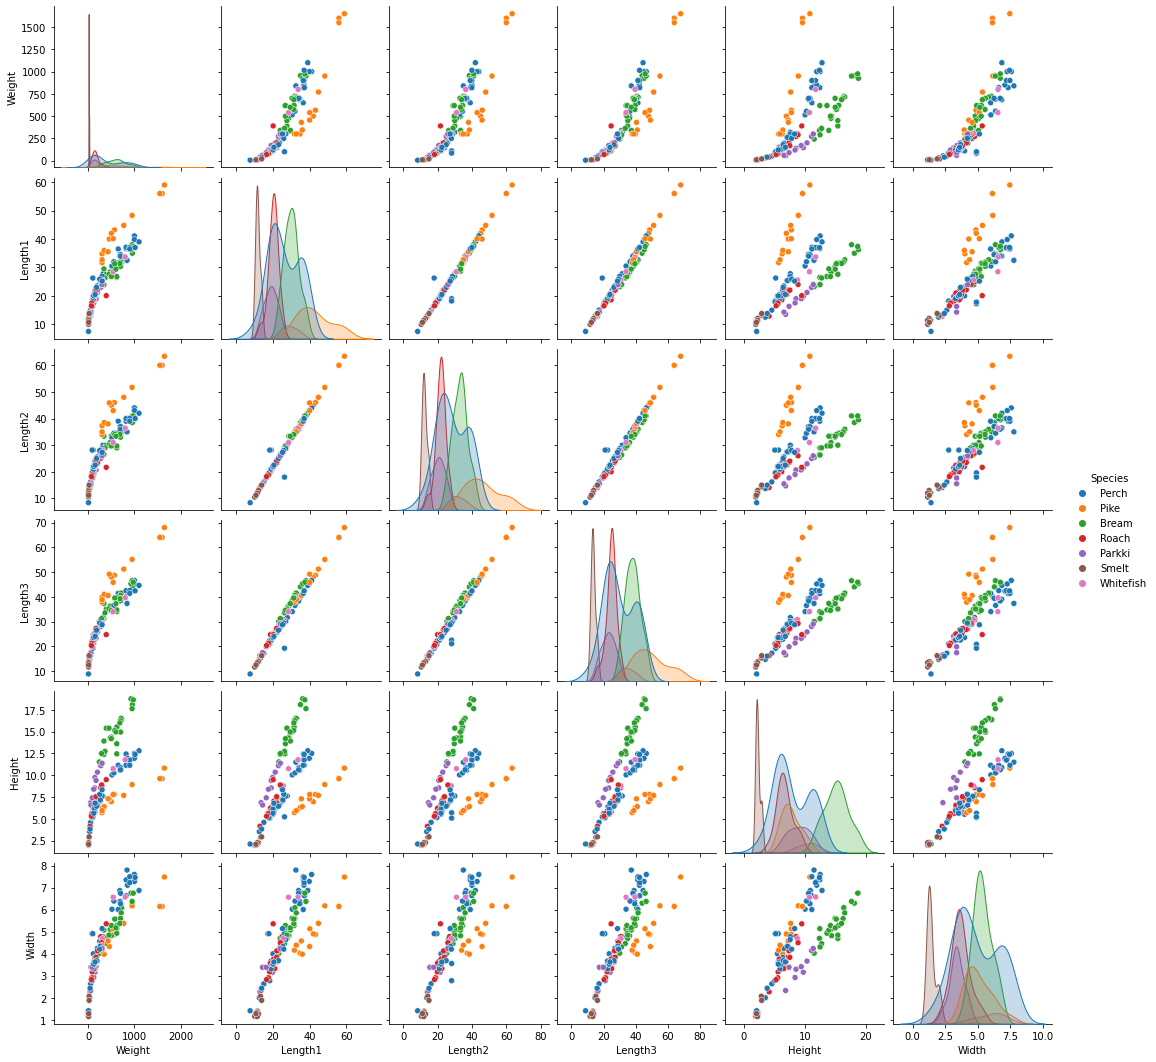

In [129]:
sns.pairplot(df_train, hue = 'Species')

In [130]:
df_train.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [131]:
df_train.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

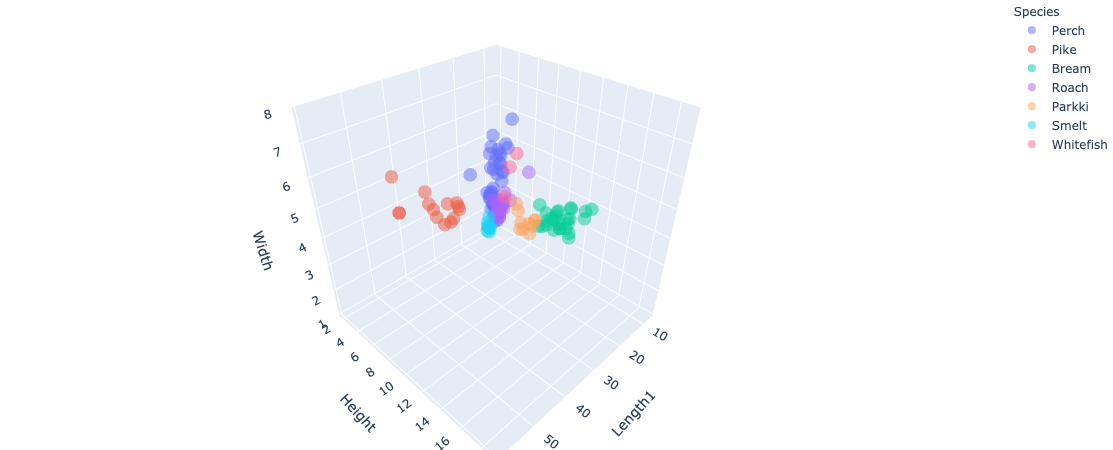

In [132]:
import plotly.express as px
# df = px.data.iris()
fig = px.scatter_3d(df_train, x='Length1', y='Height', z='Width',
              color='Species', size_max=18,
            opacity=0.5)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

In [133]:
df_train['height_weight_ratio'] = df_train['Height'] / df_train['Weight']

<ipython-input-133-5571e78b8910>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



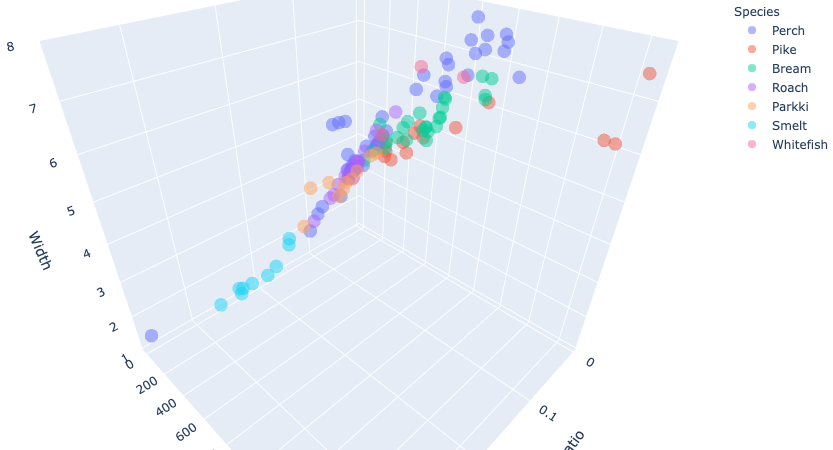

In [134]:
import plotly.express as px
# df = px.data.iris()
fig = px.scatter_3d(df_train, x= 'height_weight_ratio', y='Weight', z='Width',
              color='Species', size_max=18,
            opacity=0.5)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

In [135]:
df_train.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width',
       'height_weight_ratio'],
      dtype='object')

<AxesSubplot:xlabel='Species', ylabel='Width'>

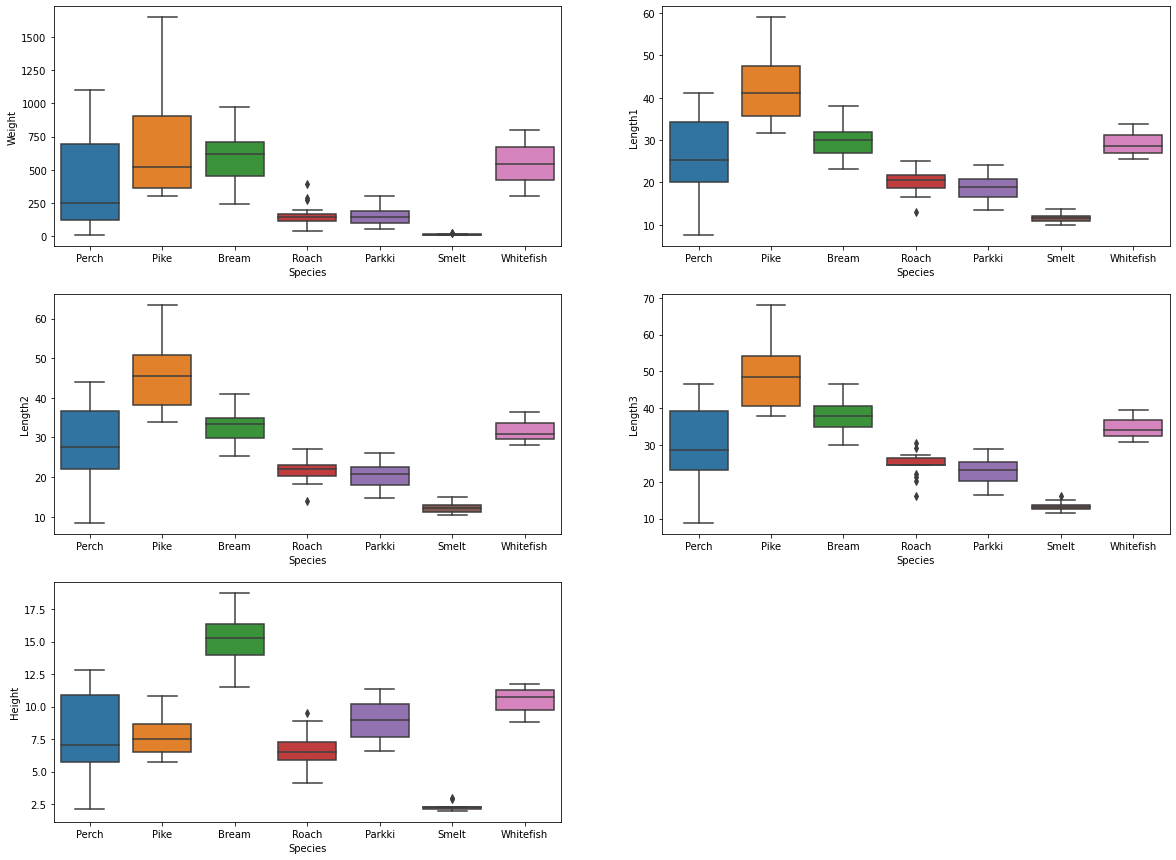

In [136]:
x = df_train['Species']

fig, axes = plt.subplots(3,2, figsize=(20,15))
fig.delaxes(axes[2][1])
sns.boxplot(y=df_train['Weight'], x = x, ax=axes[0][0])
sns.boxplot(y=df_train['Length1'], x = x, ax=axes[0][1])
sns.boxplot(y=df_train['Length2'], x = x, ax=axes[1][0])
sns.boxplot(y=df_train['Length3'], x = x, ax=axes[1][1])
sns.boxplot(y=df_train['Height'], x = x, ax=axes[2][0])
sns.boxplot(y=df_train['Width'], x = x, ax=axes[2][1])

### Remove further outliers

To do: Group by species to drop by species quartile ranges. Different for different species.

In [153]:
df_species = df_train.groupby(['Species']).quantile([0.25, 0.75])

In [154]:
df_species

Weight  Length1  Length2  Length3     Height     Width  \
Species                                                                  
Bream     0.25  456.25   27.000   29.775   34.775  13.979550  4.864700   
          0.75  710.50   31.875   35.000   40.575  16.330125  5.789180   
Parkki    0.25   97.50   16.600   18.025   20.175   7.651950  3.191425   
          0.75  192.50   20.850   22.625   25.375  10.193450  3.600300   
Perch     0.25  120.00   20.000   22.000   23.150   5.774250  3.589500   
          0.75  695.00   34.250   36.750   39.150  10.858000  6.508750   
Pike      0.25  366.25   35.625   38.125   40.625   6.537000  4.337975   
          0.75  905.00   47.425   50.775   54.125   8.642650  5.952000   
Roach     0.25  112.50   18.725   20.200   24.700   5.882025  3.301975   
          0.75  167.00   21.775   23.175   26.350   7.305950  3.831475   
Smelt     0.25    9.70   10.800   11.300   12.600   2.083200  1.255800   
          0.75   12.20   12.100   13.000   13.800   2.277000  1.393600   
Whitefish 0.25  423.00   27.050   29.500   32.400   9.761000  5.621800   
          0.75  670.00   31.100   33.700   36.800  11.252600  6.567800   

                height_weight_ratio  
Species                              
Bream     0.25             0.022130  
          0.75             0.033150  
Parkki    0.25             0.052614  
          0.75             0.079194  
Perch     0.25             0.015400  
          0.75             0.049656  
Pike      0.25             0.009541  
          0.75             0.018143  
Roach     0.25             0.039023  
          0.75             0.055003  
Smelt     0.25             0.171344  
          0.75             0.230663  
Whitefish 0.25             0.017299  
          0.75             0.024291

In [155]:
df_species.loc['Bream', 'Weight'].loc[0.25]

456.25

In [156]:
df_species.loc['Bream', 'Weight'].loc[0.75]

710.5

In [163]:
def outlier_treatment(species, datacolumn):
    sorted(datacolumn)
    Q1, Q3 = df_species.loc[species, datacolumn].loc[0.25], df_species.loc[species, datacolumn].loc[0.75]
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [164]:
species_list = list(df_train['Species'].value_counts().index)
a = set()
for i in df_train.drop('Species', axis = 1).columns:
    for species in species_list:
        lower, higher = outlier_treatment(species, i)
        l = list(((df_train.loc[df_train['Species'] == species, i] < lower) | (df_train.loc[df_train['Species'] == species, i] > higher)).index)
        for j in l:
            a.add(j)    

In [165]:
len(a)

127

Verify, something seems to be off, once done, plot the outliers.

In [32]:
df_train.drop(a, axis = 0, inplace = True)

/Users/sc47/programs/main/venv/lib/python3.8/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### Preprocess and Fit

In [33]:
X_train = df_train.drop('Weight', axis = 1)
y_train = df_train['Weight']

X_test = df_test.drop('Weight', axis = 1)
y_test = df_test['Weight']

In [34]:
X_train.shape

(123, 6)

In [35]:
y_train.shape

(123,)

In [36]:
X_train

,Species,Length1,Length2,Length3,Height,Width
138,Pike,43.2,46.0,48.7,7.7920,4.8700
56,Whitefish,24.1,26.5,29.3,8.1454,4.2485
127,Perch,41.1,44.0,46.6,12.4888,7.5958
85,Perch,19.3,21.3,22.8,6.3840,3.5340
155,Smelt,11.7,12.4,13.5,2.4300,1.2690
...,...,...,...,...,...,...
72,Perch,7.5,8.4,8.8,2.1120,1.4080
107,Perch,26.9,28.7,30.1,7.5852,4.6354
14,Bream,29.4,32.0,37.2,14.9544,5.1708
93,Perch,20.7,22.7,24.2,5.9532,3.6300


In [37]:
X_train.columns

Index(['Species', 'Length1', 'Length2', 'Length3', 'Height', 'Width'], dtype='object')

#### Standard scaling numerical attributes and one hot encoding the categorical attribute - Species

In [84]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
    ('one_hot', OneHotEncoder()),
    ])

num_attribs = ['Length1', 'Height', 'Width']
cat_attribs = ['Species']

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

full_pipeline_without_species = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
    ])

In [85]:
X_train_prepared = full_pipeline.fit_transform(X_train)
X_train_prepared_without_species = full_pipeline_without_species.fit_transform(X_train)

In [86]:
X_train_prepared.shape

(123, 10)

In [87]:
X_test_prepared = full_pipeline.transform(X_test)
X_test_prepared_without_species = full_pipeline_without_species.transform(X_test)

In [88]:
X_test_prepared.shape

(32, 10)

### Prediction using Decision Tree Regressor

In [43]:
k_value = np.arange(1, 11, 1)

In [44]:
k_value

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [45]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate

#### Using cross-validation. With Species.

In [46]:
c_list = []
train_r2_scores = []
test_r2_scores = []
train_rmse_scores = []
test_rmse_scores = []

for i in k_value:
    tree_reg = DecisionTreeRegressor()
    scores = cross_validate(tree_reg, X_train_prepared, y_train, cv=5,
                         scoring=('r2', 'neg_mean_squared_error'),
                         return_train_score=True)
    #     print(scores['train_r2'].mean(), scores['test_r2'].mean())
    train_r2_scores.append(scores['train_r2'].mean())
    test_r2_scores.append(scores['test_r2'].mean())

In [47]:
train_r2_scores

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [48]:
test_r2_scores

[0.9418082498302749,
 0.9394646495545367,
 0.9490820779912923,
 0.9408553246061565,
 0.9445789431097078,
 0.9363028084815003,
 0.9408341802025084,
 0.9331764489118906,
 0.9430682923096281,
 0.9364873548755369]

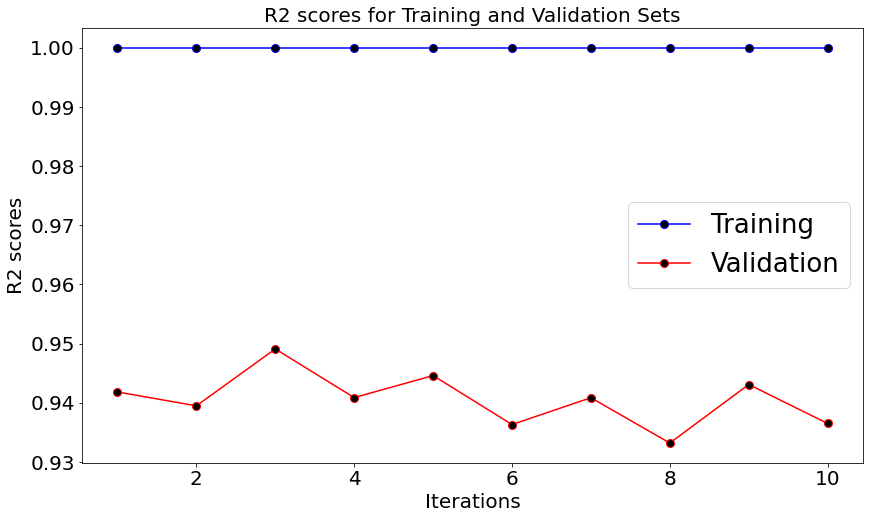

In [49]:
x = k_value
# k_value = np.arange(1, 13, 1)
y = train_r2_scores
z = test_r2_scores

plt.figure(figsize = (14, 8))

plt.plot(x, y, label = "Training",marker='o', markerfacecolor='Black', markersize=8 , color='blue')
plt.plot(x, z, label = "Validation",marker='o', markerfacecolor='Black', markersize=8 , color='red')

plt.title('R2 scores for Training and Validation Sets', fontsize = 20)
plt.xlabel('Iterations', fontsize = 20)
plt.ylabel('R2 scores', fontsize = 20)
plt.legend(fontsize = 26)
plt.tick_params(axis='both', labelsize=20)
# plt.ylim(0.90, 1.00)

In [50]:
import statistics
statistics.mean(test_r2_scores)

0.9405658329873032

The model got an average R2 score of 0.94 on the test set over 10 cross validation iterations on dataset with species.

#### Fitting on test set with species.

In [52]:
tree_reg = DecisionTreeRegressor()

tree_reg.fit(X_train_prepared, y_train)

DecisionTreeRegressor()

In [53]:
y_pred = tree_reg.predict(X_test_prepared)

In [58]:
tree_reg.get_depth()

12

In [59]:
tree_reg.get_n_leaves()

111

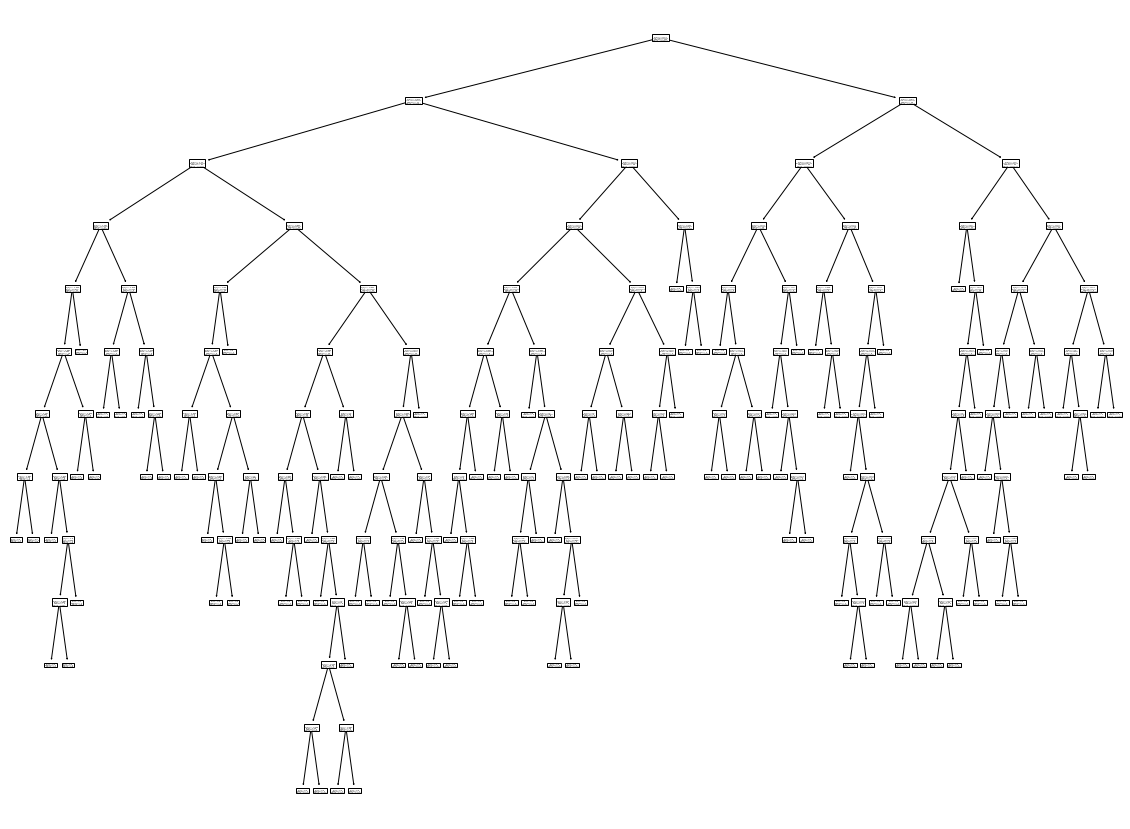

In [61]:
from sklearn.tree import plot_tree
plt.figure(figsize = (20, 15))
_ = plot_tree(tree_reg)

The model adopted depth of 12 and 111 leaves as the best values. with species.

#### Using cross-validation. Without Species.

In [89]:
c_list = []
train_r2_scores = []
test_r2_scores = []
train_rmse_scores = []
test_rmse_scores = []

for i in k_value:
    tree_reg = DecisionTreeRegressor()
    scores = cross_validate(tree_reg, X_train_prepared_without_species, y_train, cv=5,
                         scoring=('r2', 'neg_mean_squared_error'),
                         return_train_score=True)
    #     print(scores['train_r2'].mean(), scores['test_r2'].mean())
    train_r2_scores.append(scores['train_r2'].mean())
    test_r2_scores.append(scores['test_r2'].mean())

In [90]:
train_r2_scores

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [91]:
test_r2_scores

[0.9452510613611071,
 0.9398908980074108,
 0.9298475694799062,
 0.934517927709925,
 0.9386085487553638,
 0.9414959850903827,
 0.941153312809961,
 0.9378760376359079,
 0.9380290548302543,
 0.940264929362022]

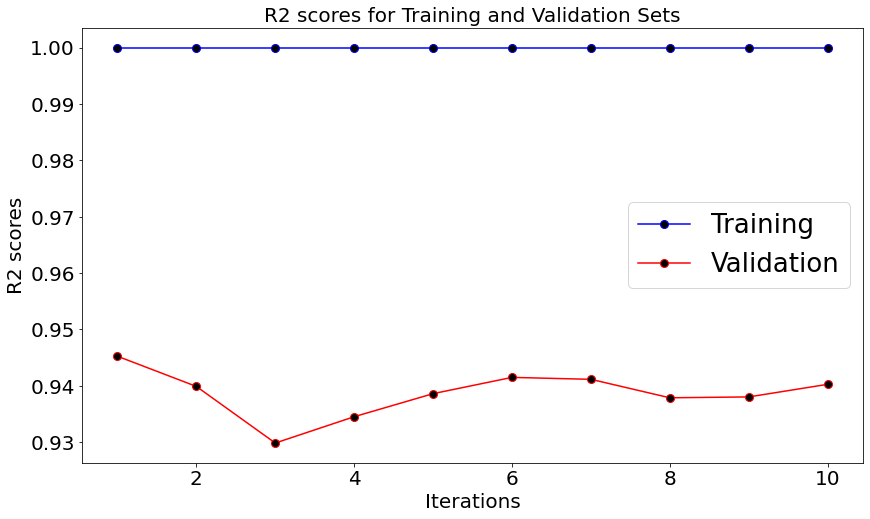

In [92]:
x = k_value
# k_value = np.arange(1, 13, 1)
y = train_r2_scores
z = test_r2_scores

plt.figure(figsize = (14, 8))

plt.plot(x, y, label = "Training",marker='o', markerfacecolor='Black', markersize=8 , color='blue')
plt.plot(x, z, label = "Validation",marker='o', markerfacecolor='Black', markersize=8 , color='red')

plt.title('R2 scores for Training and Validation Sets', fontsize = 20)
plt.xlabel('Iterations', fontsize = 20)
plt.ylabel('R2 scores', fontsize = 20)
plt.legend(fontsize = 26)
plt.tick_params(axis='both', labelsize=20)
# plt.ylim(0.90, 1.00)

In [93]:
import statistics
statistics.mean(test_r2_scores)

0.938693532504224

The model got an average R2 score of 0.94 on the test set over 10 cross validation iterations without species which is slightly less than that with species.

#### Fitting on test set without species.

In [94]:
tree_reg = DecisionTreeRegressor()

tree_reg.fit(X_train_prepared_without_species, y_train)

DecisionTreeRegressor()

In [95]:
y_pred = tree_reg.predict(X_test_prepared_without_species)

In [96]:
tree_reg.get_depth()

12

In [97]:
tree_reg.get_n_leaves()

112

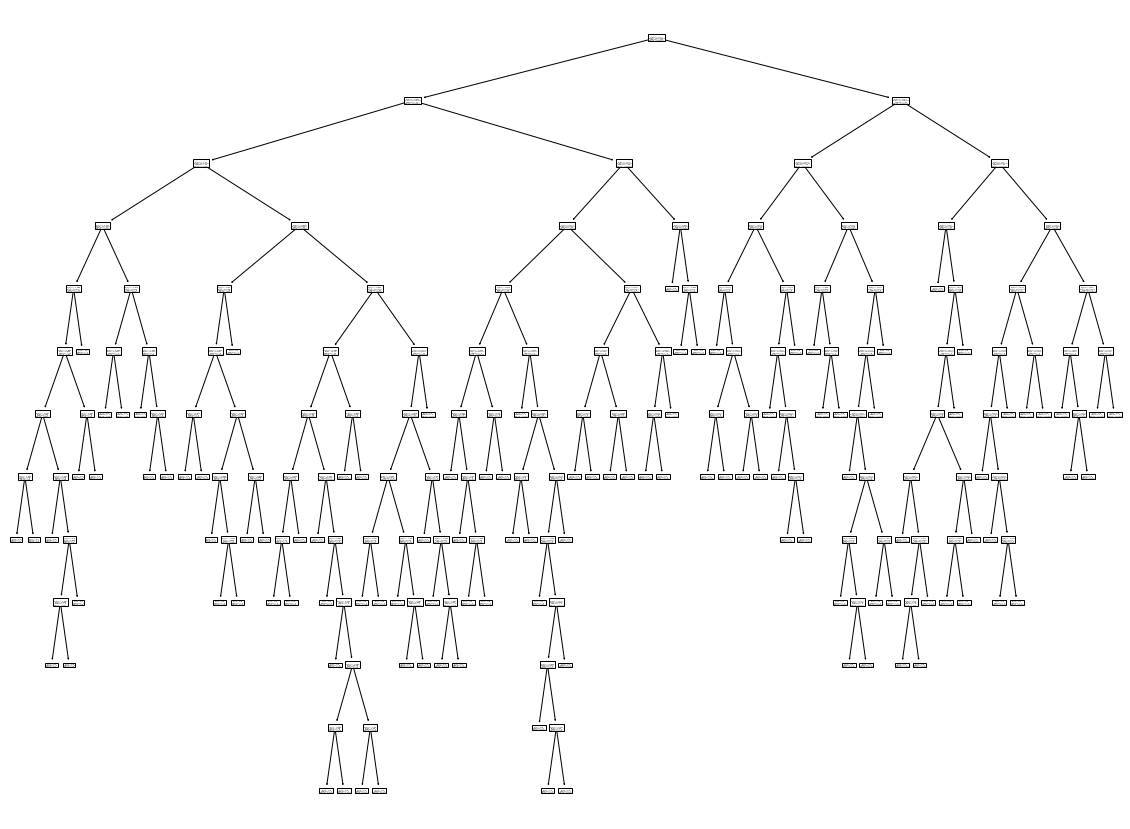

In [98]:
from sklearn.tree import plot_tree
plt.figure(figsize = (20, 15))
_ = plot_tree(tree_reg)

The model adopted depth of 12 and 112 leaves as the best values. Depth stayed same as with species and leaves increased by just 1.

### Effect of varying leaves and depth on the Train and Validation score. With Species.

In [72]:
def plotter_function(test_parameter, counter, name):
    
    # model fitting and value extraction
    test_parameter = test_parameter
    c_list = []
    train_r2_scores = []
    test_r2_scores = []
    train_rmse_scores = []
    test_rmse_scores = []

    for i in counter:
        if test_parameter == 1: 
            tree_reg = DecisionTreeRegressor(max_depth = i, random_state = 42)
        elif test_parameter == 2:
            tree_reg = DecisionTreeRegressor(max_leaf_nodes = i, random_state = 42)
        elif test_parameter == 3:
            tree_reg = DecisionTreeRegressor(max_features = i, random_state = 42)
        scores = cross_validate(tree_reg, X_train_prepared, y_train, cv=5,
                             scoring=('r2', 'neg_mean_squared_error'),
                             return_train_score=True)
        train_r2_scores.append(scores['train_r2'].mean())
        test_r2_scores.append(scores['test_r2'].mean())
            

    # plotting graphs
    
    x = counter
    # k_value = np.arange(1, 13, 1)
    y = train_r2_scores
    z = test_r2_scores

    plt.figure(figsize = (14, 8))

    plt.plot(x, y, label = "Training",marker='o', markerfacecolor='Black', markersize=8 , color='blue')
    plt.plot(x, z, label = "Validation",marker='o', markerfacecolor='Black', markersize=8 , color='red')

    plt.title('R2 scores for Training and Validation Sets', fontsize = 20)
    plt.xlabel('{}'.format(name), fontsize = 20)
    plt.ylabel('R2 scores', fontsize = 20)
    plt.legend(fontsize = 26)
    plt.tick_params(axis='both', labelsize=20)
    # plt.ylim(0.90, 1.00)

#### Varying Max Depth

In [65]:
max_depth_list = np.arange(1, 20, 1)

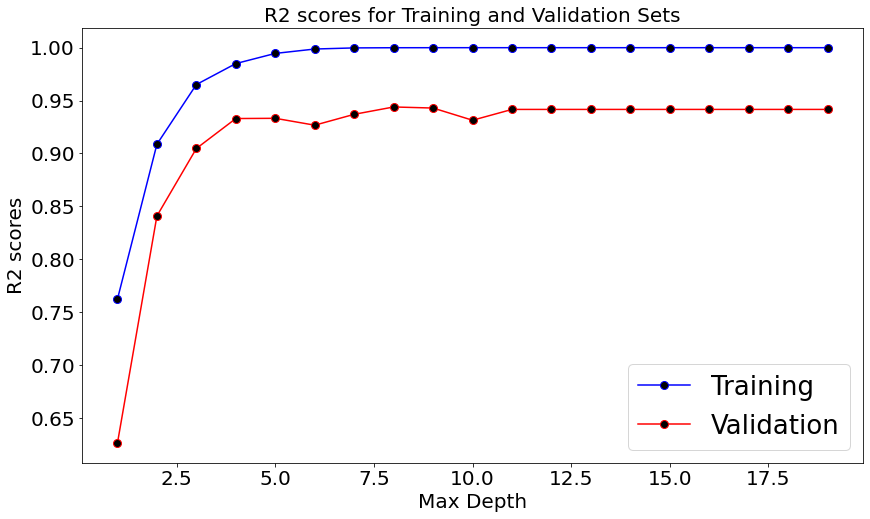

In [66]:
plotter_function(1, max_depth_list, 'Max Depth')

The R2 score for both train as well as validation sets increases with increasing value of Max Depth till 5 - 8. Beyond that it stabilised to a value around approximately 0.93 - 0.95.

#### Varying Max Leaf Nodes

In [70]:
max_leafs_list = np.arange(5, 200, 5)

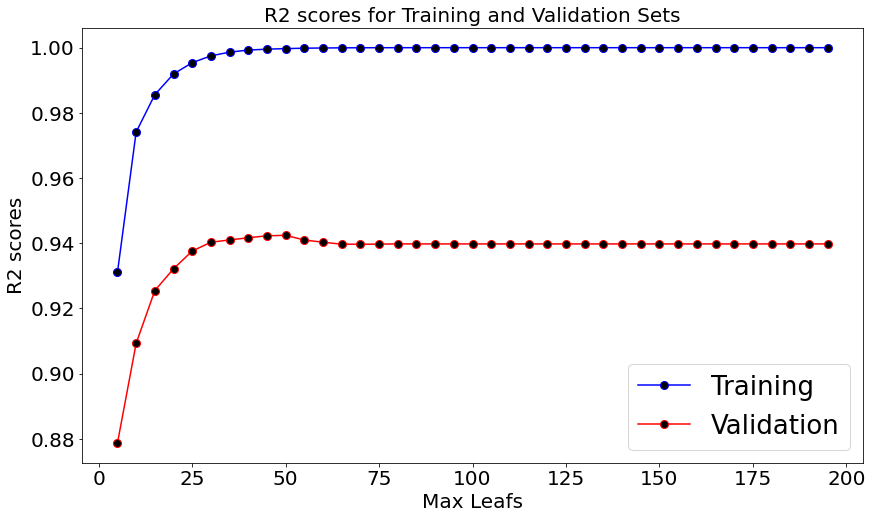

In [71]:
plotter_function(2, max_leafs_list, 'Max Leafs')

The R2 score for both train as well as validation sets increases with increasing value of Max Leaf Nodes till 50 - 80. Beyond that it stabilised to a value around approximately 0.94.

#### Varying Max Features

In [81]:
max_features_list = np.arange(1, 10, 1)

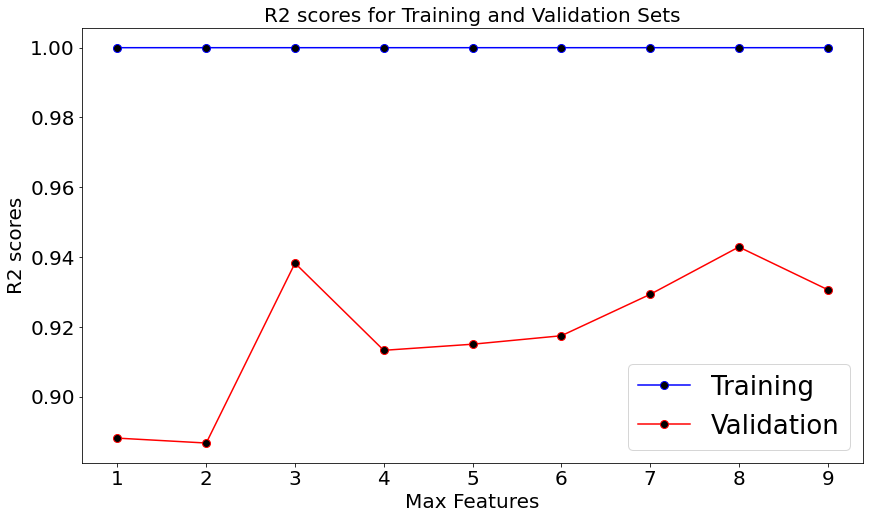

In [82]:
plotter_function(3, max_features_list, 'Max Features')

Validation R2 score improves on using more features.